**Image Compression using K_Means**

In this Task,we are given a RGB image which we have compress using K-means.

Using K-Means,we can cluster the pixels in an image into a smaller number of groups and then represent these groups by its mean color leading to itx compression(decrease in its size with much reduction in visual quality)


Image shape: (512, 512, 3)


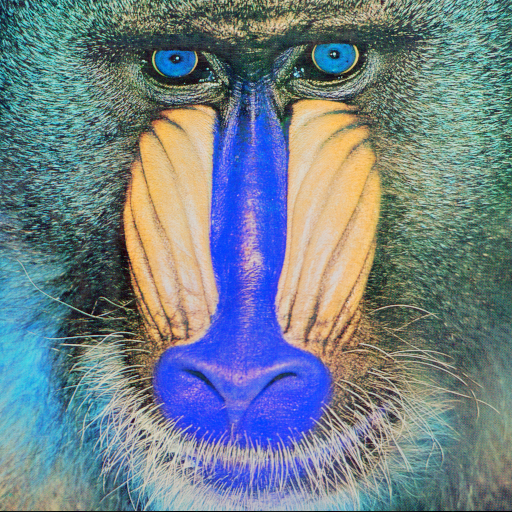

Image Compression using kmeans defined from scratch


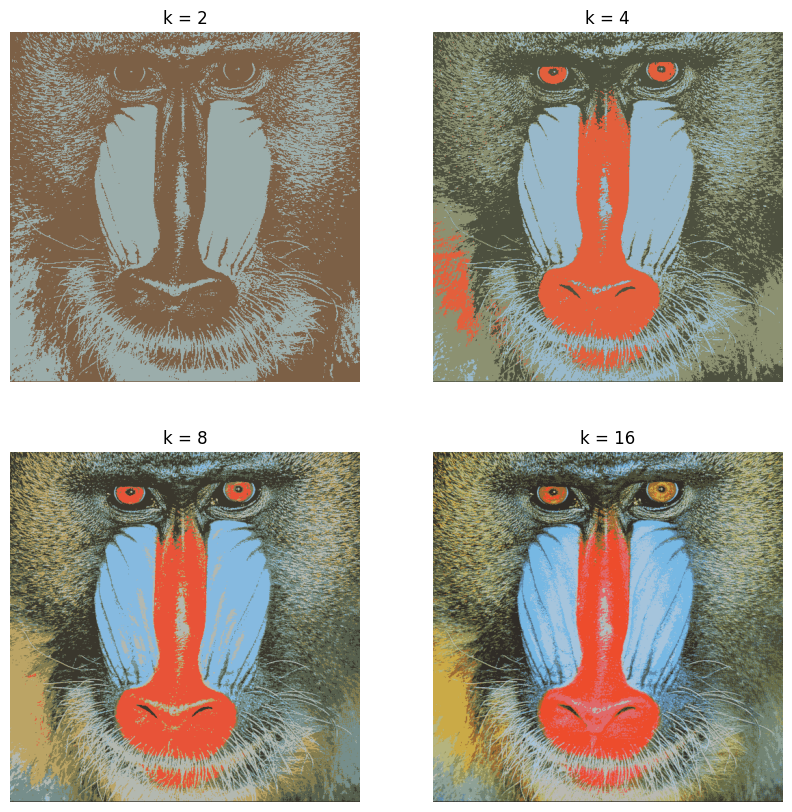

-------------------------------------------------------------------------------------------------------------
Image Compression using sklearn kmeans 


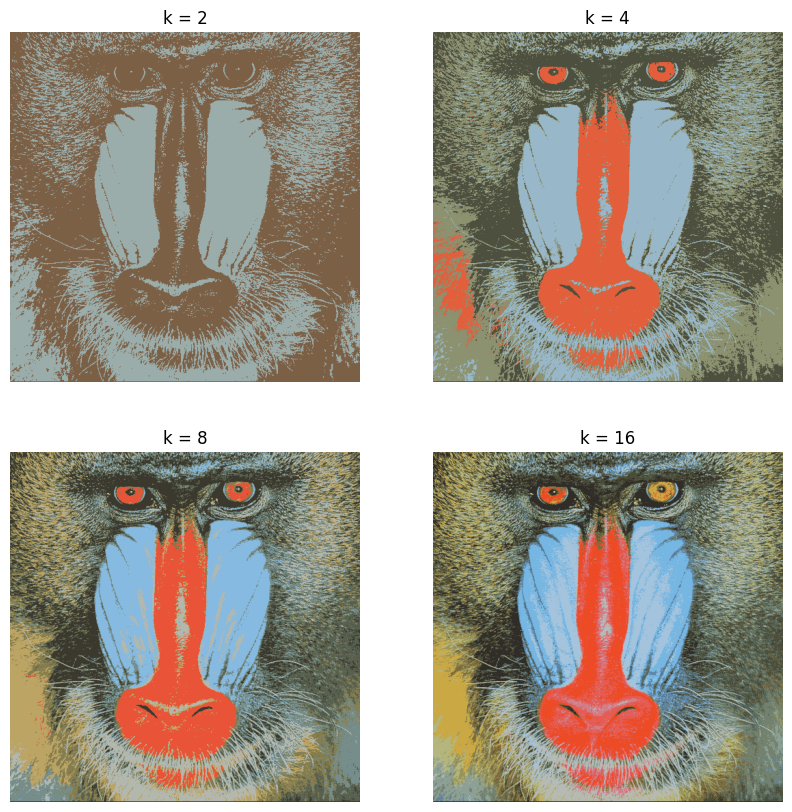

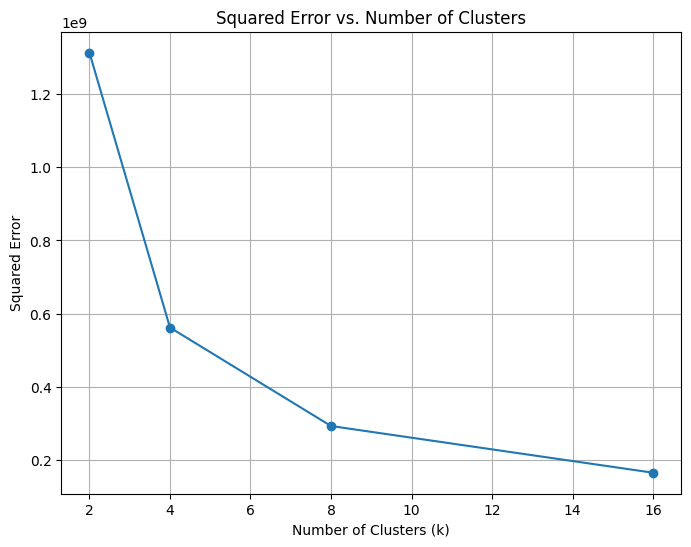

In [2]:
#importing required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
!pip install opencv-python-headless
from google.colab.patches import cv2_imshow
import imageio.v2 as imageio

#Task (a) and (b)
# computeCentroid function, that takes n 3-dimensional features and returns their mean.
def computeCentroid(X):
    return np.mean(X, axis=0)

#mykmeans from scratch that takes data matrix X of size m×3 where m is the number of pixels in the image and the number of clusters k. It returns the cluster centers using the k-means algorithm.
def mykmeans(X, k, max_iter=100, tol=1e-6):
    m, n = X.shape

    # Initializing cluster centroids randomly
    centroids = X[np.random.choice(m, k, replace=False), :]

    # Looping until convergence or maximum iterations reached
    for iter in range(max_iter):
        # Computing distances between data points and centroids
        distances = np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=-1))

        # Assigning data points to closest centroids
        cluster_assignments = np.argmin(distances, axis=1)

        # Updating centroids by taking the mean of assigned data points
        new_centroids = np.zeros((k, n))
        for i in range(k):
            cluster_points = X[cluster_assignments == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)

        # Checking convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids

#Task (c)
image_url = 'https://raw.githubusercontent.com/the-punisher-29/PRML_Assignment-data/main/test.png'
# Loading the image
image = imageio.imread(image_url)
print("Image shape:", image.shape)
# Displaying the image(RGB form)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''img1=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2_imshow(img1)
cv2.waitKey(0)
cv2.destroyAllWindows()'''
# Reshaping the image data to (m, 3) where m is the number of pixels
h, w, c = image.shape
X = image.reshape(-1, c)
#values of k
k_values = [2, 4, 8, 16]

# Compressing the image using k-means defined froms scratch for different values of k
compressed_images = []
for k in k_values:
    centroids = mykmeans(X, k)
    compressed_image = centroids[np.argmin(np.sqrt(((X[:, np.newaxis, :] - centroids) ** 2).sum(axis=-1)), axis=1)]
    compressed_image = compressed_image.reshape(h, w, 3).astype(np.uint8)
    compressed_images.append(compressed_image)

# Displaying the compressed images
print('Image Compression using kmeans defined from scratch')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(len(compressed_images)):
    ax = axs.flatten()[i]
    compressed_image = compressed_images[i]
    ax.imshow(compressed_image)
    ax.set_title(f'k = {k_values[i]}')
    ax.axis('off')

plt.show()
print('-------------------------------------------------------------------------------------------------------------')

#Task (d)
#compressing the image using ready made-kmeans from sklearn library
from sklearn.cluster import KMeans
'''cv2.imshow("RGB_Image", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

# Reshaping the image
h, w, c = image.shape
X = image.reshape(-1, c)
#values of k
k_values = [2, 4, 8, 16]

# Compressing the image using scikit-learn k-means
compressed_images = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=29, n_init=10).fit(X)
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = compressed_image.reshape(h, w, c).astype(np.uint8)
    compressed_images.append(compressed_image)

# Displaying the compressed images
print('Image Compression using sklearn kmeans ')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
for i, (ax, compressed_image) in enumerate(zip(axs, compressed_images)):
    ax.imshow(compressed_image)
    ax.set_title(f'k = {k_values[i]}')
    ax.axis('off')

plt.show()
#squared error for a given k
def calculate_squared_error(X, k):
    kmeans = KMeans(n_clusters=k, random_state=29, n_init=10).fit(X)
    squared_error = kmeans.inertia_
    return squared_error
#  squared error for each k
squared_errors = [calculate_squared_error(X, k) for k in k_values]
# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, squared_errors, marker='o', linestyle='-')
plt.title('Squared Error vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Squared Error')
plt.grid(True)
plt.show()

Incorporating spatial information or spatial coherence is an important aspect of image compression using k-means clustering. The idea is to consider not only the pixel values (colors) but also their spatial locations when assigning pixels to clusters. This helps to preserve local structures and reduce artifacts like color bleeding or noise in the compressed image.
By including spatial information in the clustering process, pixels that are spatially close to each other are more likely to be assigned to the same cluster, even if their pixel values are slightly different. This helps maintain spatial coherence and reduces artifacts in the compressed image.

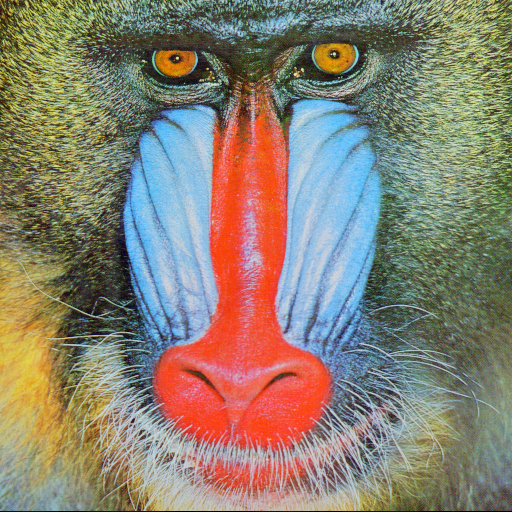

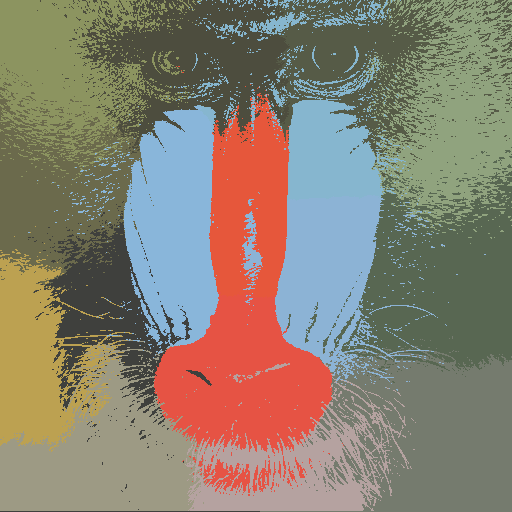

<Figure size 1000x500 with 0 Axes>

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def spatial_distance(x1, y1, x2, y2):
    #Euclidean distance between two points
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

def spatial_coherence_distance(pixel1, pixel2, spatial_weight=0.5):
    # Calculating spatial coherence distance between two pixels
    color_distance = np.linalg.norm(pixel1 - pixel2)
    spatial_distance = spatial_weight * spatial_distance(pixel1[0], pixel1[1], pixel2[0], pixel2[1])
    return color_distance + spatial_distance

def compress_image_with_spatial_coherence(image, k, spatial_weight=0.5):
    h, w, c = image.shape
    X = image.reshape(-1, c)

    # Generating spatial coordinates
    spatial_coordinates = np.array(np.meshgrid(range(h), range(w))).reshape(2, -1).T

    # Combining color features and spatial coordinates
    features = np.concatenate((X, spatial_coordinates), axis=1)

    # Performing K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=29, n_init=10).fit(features)
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_[:, :c]  # Exclude spatial coordinates from cluster centers

    # Reconstructing compressed image
    compressed_image = np.zeros_like(X)
    for i, label in enumerate(labels):
        compressed_image[i] = cluster_centers[label]
    compressed_image = compressed_image.reshape(h, w, c).astype(np.uint8)

    return compressed_image

#image to BGR color space
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
compressed_image = compress_image_with_spatial_coherence(image_bgr, k=16, spatial_weight=0.5)

#original and compressed images
plt.figure(figsize=(10, 5))
cv2_imshow(image_bgr)
cv2_imshow(compressed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Qno2-
Learning about decision boundariers of SVM and fine tuning its hyperparameters;


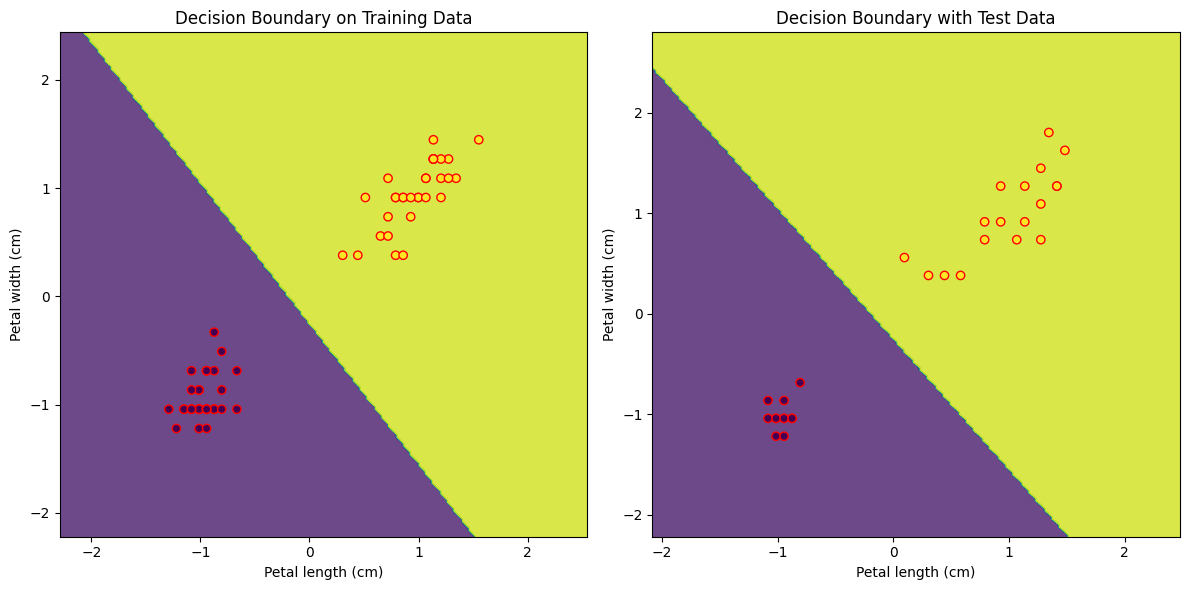

In [ ]:
#Task 1a and 1b
#importing rtequired libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Loading the Iris dataset
iris = datasets.load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']]
y = iris.target
# Selecting only 'setosa' and 'versicolor' classes
mask = y != 2
X = X[mask]
y = y[mask]
# Normalizing the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=29)

# Training (LinearSVC)
model = LinearSVC(dual=False)
model.fit(X_train, y_train)

#function for plotting decision boundary
def plot_decision_boundary(ax, X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolors='red')
    ax.set_xlabel('Petal length (cm)')
    ax.set_ylabel('Petal width (cm)')
    ax.set_title(title)

# Plotting decision boundaries with training and test data
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundary(axs[0], X_train, y_train, model, 'Decision Boundary on Training Data')
plot_decision_boundary(axs[1], X_test, y_test, model, 'Decision Boundary with Test Data')
plt.tight_layout()
plt.show()


Conclusions from similar decison boundaries on train and test data:-

1.Good Generalization of model for given classes of data

2.No Overfitting

3.Model Complexity is suitable for chosen data

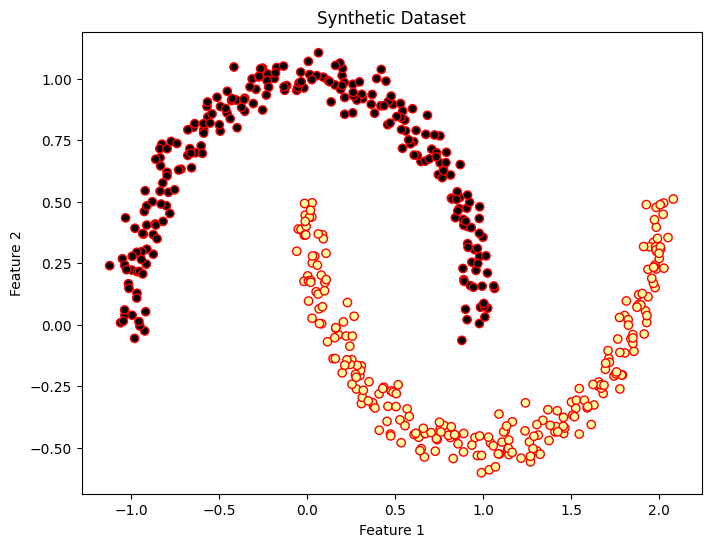

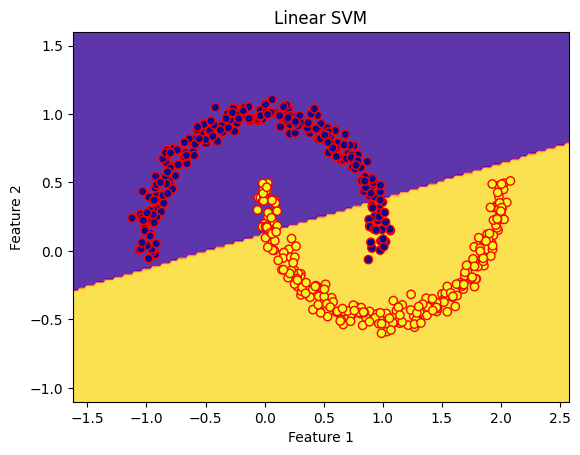

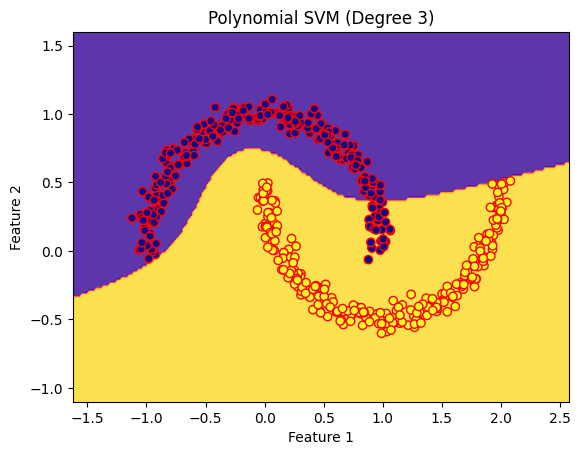

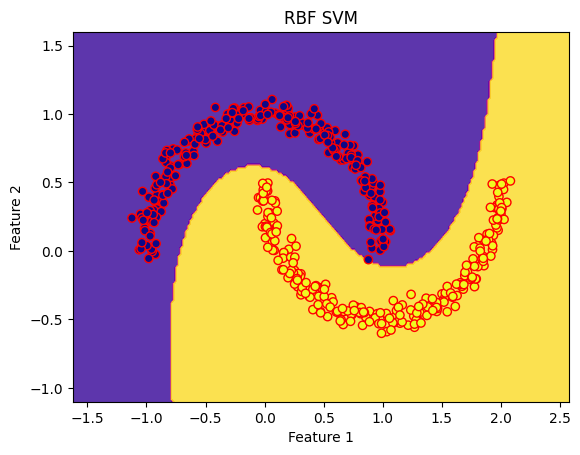

Best hyperparameters: {'C': 100, 'gamma': 0.1}


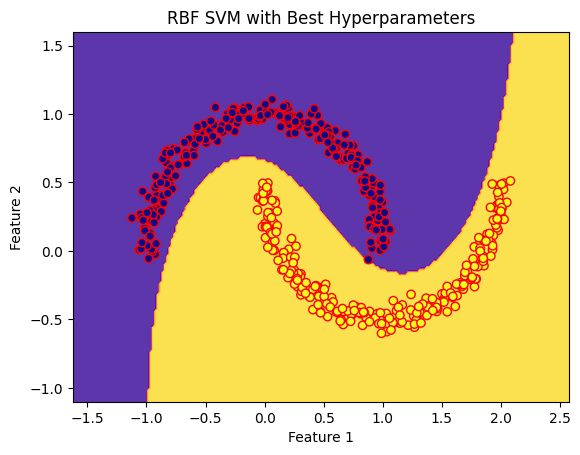

Best hyperparameters: {'C': 49153.79531805762, 'gamma': 0.026042945653903988}


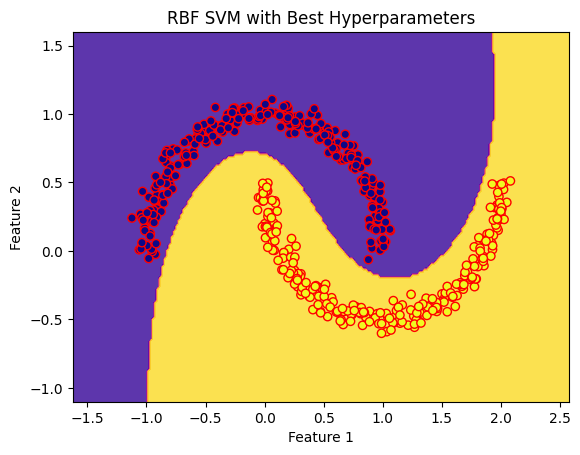

In [1]:
#Task 2(a),2(b),2(c),2(d)

#a
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generating synthetic dataset with make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=29)
# visualzing the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.inferno, edgecolors='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Dataset')
plt.show()

#b
#plotting decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  #step size
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.plasma, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.plasma, edgecolors='red')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Linear SVM
linear_svc = SVC(kernel='linear')
linear_svc.fit(X, y)
plot_decision_boundary(linear_svc, X, y, 'Linear SVM')

# Polynomial SVM
poly_svc = SVC(kernel='poly', degree=3)# taking polynomial of degree 3
poly_svc.fit(X, y)
plot_decision_boundary(poly_svc, X, y, 'Polynomial SVM (Degree 3)')

# RBF SVM
rbf_svc = SVC(kernel='rbf', gamma='auto')
rbf_svc.fit(X, y)
plot_decision_boundary(rbf_svc, X, y, 'RBF SVM')

#c and d
from sklearn.model_selection import GridSearchCV
#parameter grid defination
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001, 0.0001]}
#GridSearchCV object creation
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy')
# Performing grid search
grid_search.fit(X, y)
#best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
#best model
best_rbf_svc = grid_search.best_estimator_
#decision boundary of the best model
plot_decision_boundary(best_rbf_svc, X, y, 'RBF SVM with Best Hyperparameters')

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
# Parameter grid definition
param_distribs = {
    'C': reciprocal(20, 200000),
    'gamma': reciprocal(0.0001, 0.1),
}
# RandomizedSearchCV object creation
random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_distributions=param_distribs, n_iter=10, cv=5, scoring='accuracy')
# Performing random search
random_search.fit(X, y)
# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)
# Best model
best_rbf_svc = random_search.best_estimator_
# Decision boundary of the best model
plot_decision_boundary(best_rbf_svc, X, y, 'RBF SVM with Best Hyperparameters')

In [ ]:
#e
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import ipywidgets as widgets
from ipywidgets import interactive

# Generate synthetic dataset with make_moons
X, y = make_moons(n_samples=500, noise=0.05, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Function to plot decision boundary and support vectors
def plot_decision_boundary_with_sv(C=1.0, gamma=1.0):
    svm = SVC(kernel='rbf', C=C, gamma=gamma)
    svm.fit(X_normalized, y)
    xx, yy = np.meshgrid(np.linspace(-2, 2, 500),
                         np.linspace(-2, 2, 500))
    Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'red'])
    plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary and Support Vectors')
    plt.show()

# Interactive widget for hyperparameter selection
interactive_plot = interactive(plot_decision_boundary_with_sv,
                               C=widgets.FloatSlider(min=0.1, max=10, step=0.1, value=1.0, description='C'),
                               gamma=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1.0, description='Gamma'))
interactive_plot


interactive(children=(FloatSlider(value=1.0, description='C', max=10.0, min=0.1), FloatSlider(value=1.0, descr…